<a href="https://colab.research.google.com/github/jcdevaney/TOSS2025/blob/main/toss2025_notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load files from Git repository

In [1]:
!git clone https://github.com/jcdevaney/toss2025.git

Cloning into 'toss2025'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 88 (delta 6), reused 10 (delta 4), pack-reused 73 (from 2)
Receiving objects: 100% (88/88), 57.29 MiB | 10.91 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (62/62), done.


# Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

# Functions to plot a spectrogram with an overlay of imported data

In [3]:
def overlayPlot(audiofile,dataDF,title):
    # open audio file
    y, fs = librosa.load(audiofile)

    # run the short time fourier transform
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Create a figure and primary axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Display the spectrogram on the left y-axis
    librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
    ax1.set_ylabel('Spectrogram Power (dB)', color='tab:red')

    # Create a secondary y-axis and plot the time series on it
    ax2 = ax1.twinx()
    ax2.plot(dataDF['Time'], dataDF['Data'], label='Time Series', color='tab:blue')
    ax2.set_ylabel('Energy', color='tab:blue')

    # Add a colorbar for the spectrogram
    cbar = plt.colorbar(format='%+2.0f dB', ax=ax1)
    cbar.set_label('Power (dB)')

    plt.title(title)
    plt.show()

def plotTimePoints(D,sr,times):

  # plot spectrogram
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')

  # Let's draw transparent lines over the beat frames
  plt.vlines(times,
            1, 0.5 * sr,
            colors='w', linestyles='-', linewidth=2, alpha=0.5)

  plt.axis('tight')

  plt.colorbar(format='%+02.0f dB')

  plt.tight_layout()

# Load and examine a VAMP plugin csv file (RMS Energy)

In [4]:
# load CSV file, adding column names for time and data
csvEx = pd.read_csv('/content/toss2025/audio/sonicVisualiser/avm_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv',names=['Time','Data'])
csvEx

,Time,Data
0,0.000000,0.001507
1,0.023220,0.001074
2,0.046440,0.001062
3,0.069660,0.000845
4,0.092880,0.000870
...,...,...
489,11.354558,0.001692
490,11.377778,0.001666
491,11.400998,0.002047
492,11.424218,0.002216


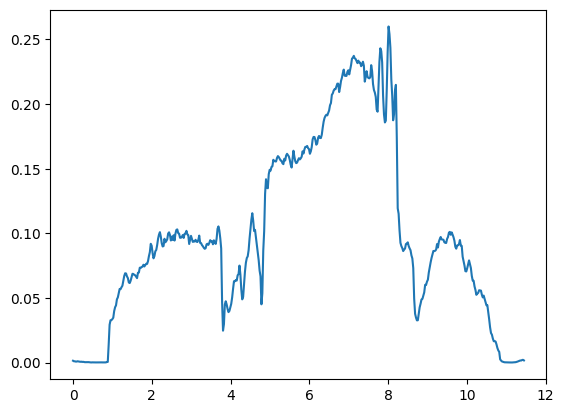

In [5]:
# plot the imported CSV data, using the time values for the x-axis
plt.plot(csvEx['Time'],csvEx['Data'])

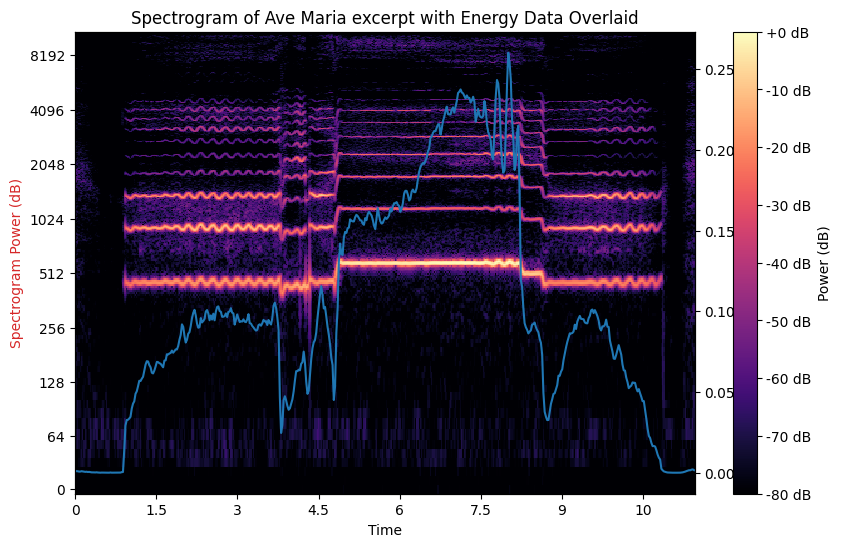

In [6]:
# plot the imported CSV data over a spectrogram of the correspponding audio
audiofileEX = '/content/toss2025/audio/avm.wav'
titleEX = 'Spectrogram of Ave Maria excerpt with Energy Data Overlaid'
overlayPlot(audiofileEX,csvEx,titleEX)